# FRB 180916.J0158 + 65: Análisis tiempo-frecuencia

Si el contenido espectral de una serie de tiempo no es estacionario, la transformada de Fourier tiene problemas para descomponerla. En este caso conviene usar herramientas que hacen el análisis simultáneamente en el dominio del tiempo y en el de la frecuencia.

In [51]:
import numpy as np
import pandas as pd
from math import pi
from numpy.fft import fft, fftfreq, rfft, rfftfreq
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 15,12

En el siguiente ejemplo calculamos el espectro de una serie periódica cuya frecuencia cambia súbitamente de 1 Hz a 3 Hz.

Text(0, 0.5, 'Amplitud')

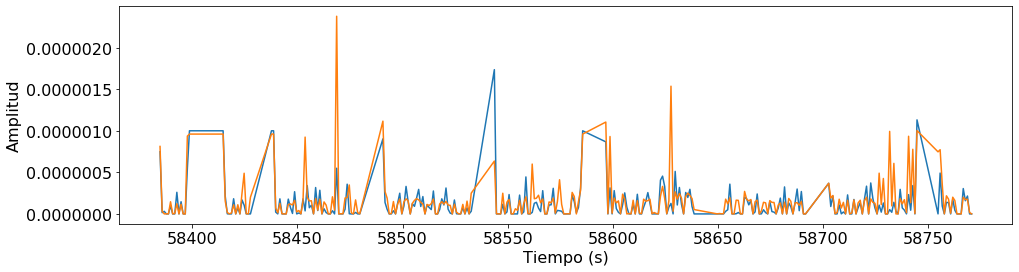

In [13]:
#tiempo = np.linspace(0,10,1000)
#serie = np.concatenate([np.sin(2*pi*tiempo)[:500], np.sin(2*pi*tiempo*3)[:500]])
data_crudos = pd.read_csv("/home/wattie/frb/conteo.csv", index_col='mjd')
serie = data_crudos.dropna()
df = pd.DataFrame(serie)
plt.plot(serie)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

Aunque las dos frecuencias (1 y 3 Hz) son las dominantes, existe mucha estructura espuria alrededor:

Text(0, 0.5, 'PSD')

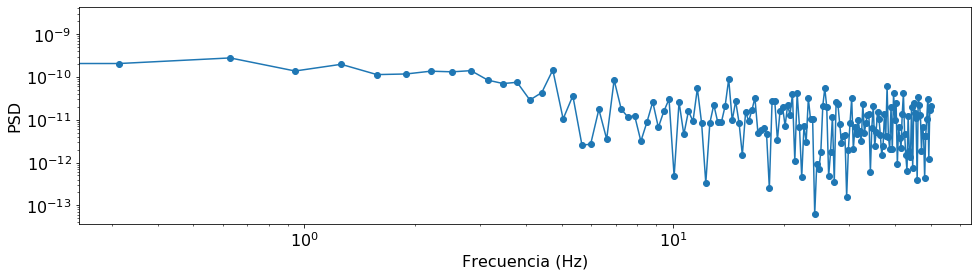

In [16]:
psd = np.abs(rfft(df.flux))**2
freqs = rfftfreq(len(df.flux),d=0.01)
plt.loglog(freqs,psd,"o-")
#plt.axvline(1,linestyle="--",color="k")
#plt.axvline(3,linestyle="--",color="k")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD")

Otro ejemplo clásico es el "chirp", una señal cuya frecuencia aumenta con el tiempo (en este caso de 1 a 3 Hz):

In [18]:
#tiempo = np.linspace(0,10,1000)
#frecuencia = 1 + tiempo*2/10
#plt.figure()
#plt.plot(tiempo,frecuencia)
#plt.xlabel("Tiempo (s)")
#plt.ylabel("Frecuencia instantánea (Hz)")
#plt.figure()
#serie = np.sin(2*pi*tiempo*frecuencia)
#plt.plot(tiempo,serie)
#plt.xlabel("Tiempo (s)")
#plt.ylabel("Amplitud")

Aunque la frecuencia instantánea de la serie va desde 1 Hz hasta 3 Hz, el PSD contiene potencia en otras frecuencias espurias fuera de este rango

In [19]:
#psd = np.abs(rfft(serie))**2
#freqs = rfftfreq(len(serie),d=0.01)
#plt.loglog(freqs,psd,"o-")
#plt.axvline(1,linestyle="--",color="k")
#plt.axvline(3,linestyle="--",color="k")
#plt.xlabel("Frecuencia (Hz)")
#plt.ylabel("PSD")

### Transformada de Fourier ventaneada

Una forma de lidiar con series no-estacionarias es hacer el análisis en tiempo y frecuencia simultáneamente.

Una técnica sencilla es usar la **transformada de Fourier "ventaneada"** o **Short-Time-Fourier-Transform (STFT**): calculamos la transformada de Fourier en una ventana temporal pequeña la cual se va recorriendo sobre la serie. Con esto se puede capturar un contenido espectral que cambia con el tiempo.

La función scipy.signal.spectrogram() permite el cálculo automático de este tipo de transformada tiempo-frecuencia; la forma de la ventana se puede seleccionar mediante el argumento 'window'.

Hagamos esto con un chirp que aumenta de 1000 Hz a 5000 Hz en 10 segundos:

Text(0.5, 0, 'Tiempo (s)')

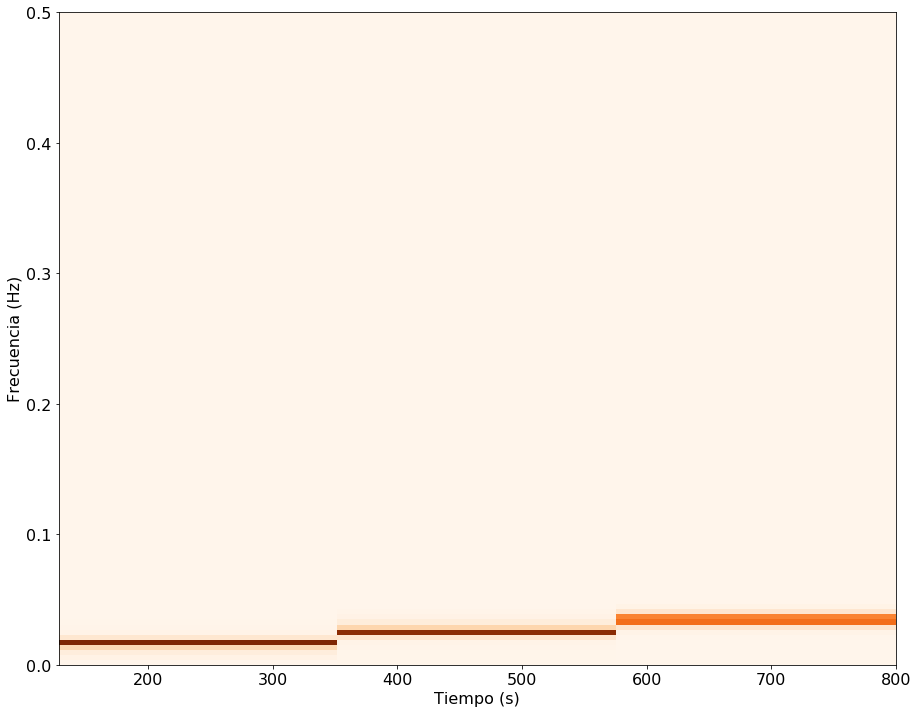

In [34]:
#fs = 10e3
#fs = 10e3
#N = 1e5
#tiempo = np.arange(N) / fs
#frecuencia = np.linspace(1e3, 3e3, N)
#serie = np.sin(2*pi*frecuencia*tiempo)
f, t, Sxx = signal.spectrogram(serie)
#plt.figure(figsize=(16,8))
plt.pcolormesh(t, f, Sxx, cmap="Oranges")
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')

### Transformada de wavelet

Otra herramienta relacionada de análisis de tiempo-frecuencia son las transformadas de **wavelets**.

Es una generalización de la transformada de Fourier: en lugar de usar funciones armónicas se usan “wavelets”: formas de onda arbitraria que pueden cambiar de escala temporal. Esto permite hacer una reconstrucción en tiempo-frecuencia con mejor resolución que la transformada de Fourier ventaneada (la wavelet es una ventana deformable).

En el siguiente ejemplo sumamos un coseno (primer panel) y un pulso gaussiano (segundo panel), y de la serie combinada (tercer panel) calculamos la transformada de wavelet (cuarto panel) usando signal.cwt.

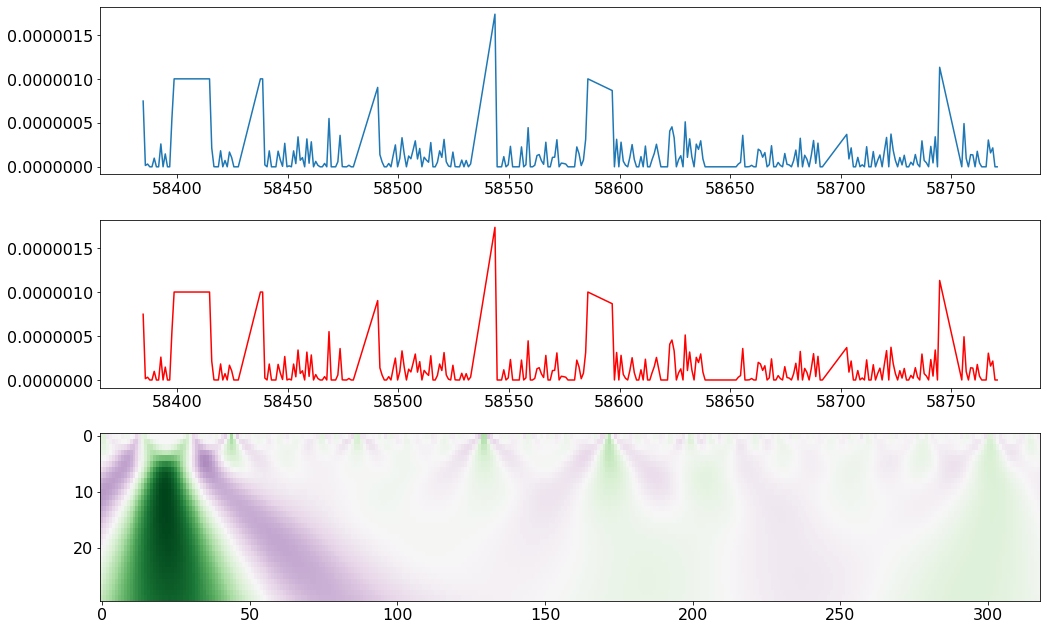

In [100]:
#t = np.linspace(-1, 1, 200, endpoint=False)
#sig1 = np.cos(2 * np.pi * 7 * t)
#sig2 = signal.gausspulse(t - 0.4, fc=2)
#sig3 = sig1 + sig2
widths = np.arange(1, 31)
cwtmatr = signal.cwt(df.flux, signal.ricker, widths)



#plt.subplot(411)
#plt.plot(t,sig1)
plt.subplot(412)
plt.plot(df.flux)
plt.subplot(413)

plt.plot(df.flux,"r")
#plt.figure(figsize=(16,8))

plt.subplot(414)

plt.imshow(cwtmatr, cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
